In [1]:
#!python -m pip install git+https://github.com/fastai/fastai.git

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df1 = pd.read_csv('banknifty_train_csv.csv')
df2 = pd.read_csv('banknifty_test_csv.csv')
df_frame = [df1,df2]
df = pd.concat(df_frame)
#print the head
df.tail()

,Date,Open,High,Low,Close,Volume,Turnover
16,2018-10-25,24841.50,24977.35,24696.85,24817.45,215033794.0,6.855910e+10
17,2018-10-26,24771.85,24771.95,24353.10,24421.05,219130974.0,5.370590e+10
18,2018-10-29,24647.95,25023.75,24404.55,24959.70,279844102.0,8.145830e+10
19,2018-10-30,24924.75,25121.50,24686.85,24807.75,257591034.0,6.320860e+10
20,2018-10-31,24823.80,25201.30,24528.35,25153.25,241789641.0,6.831520e+10


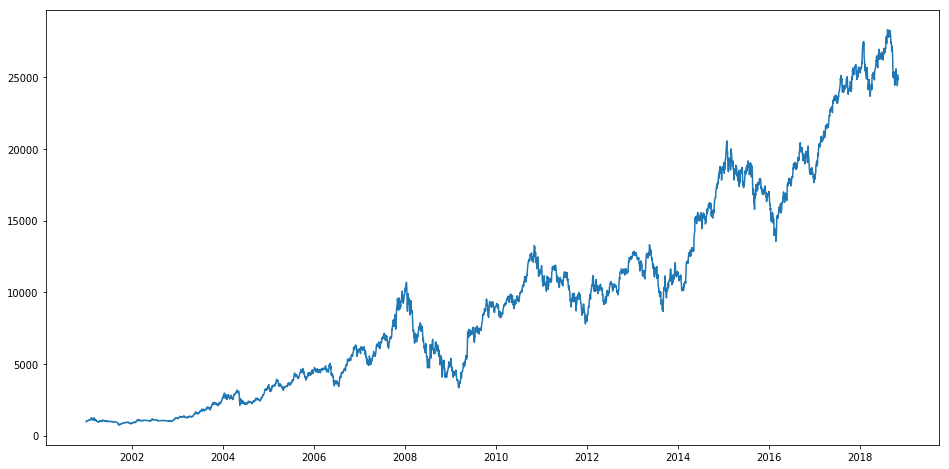

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [3]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [4]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
#splitting into train and validation
upto =len(new_data)-248

print(upto)
train = new_data[:upto]
valid = new_data[upto:]

4191


In [5]:
new_data.shape, train.shape, valid.shape

((4439, 1), (4191, 1), (248, 1))

In [6]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [7]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend
from tensorflow.python.keras.layers.core import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.keras.models import Sequential






In [8]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [9]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
upto =len(new_data)-248
print(upto)
train = dataset[0:upto,:]
valid = dataset[upto:,:]

4191


In [10]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
x_train.shape, y_train.shape

((4131, 60, 1), (4131,))

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

4131/4131 - 833s - loss: 4.6759e-04


In [19]:
len(closing_price)
type(closing_price)

numpy.ndarray

In [27]:
len(valid)

248

In [32]:
#valid['Predictions'] =0
valid['Predictions'].set_indx(closing_price) 
type(valid)
valid

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(valid['Predictions'])),2)))
rms

In [ ]:
valid.columns



In [ ]:
#for plotting
#dataset = new_data.values
#upto =len(new_data)-248
#print(upto)
#train = new_data[:upto]
#valid = new_data[upto:]

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [ ]:
from keras.models import model_from_json
import os
symbol = "BANKNIFTY"

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(symbol+".h5")
print("Saved model to disk")


In [ ]:

inputs = new_data[len(new_data) - len(valid)-60:].values

In [ ]:
new_data.shape

In [ ]:
len(new_data) - len(valid)-60

In [ ]:
new_data[len(new_data)-len(valid)-60:].shape

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
len(inputs)


In [ ]:
inputs.shape[0]

In [ ]:
val = len(new_data) - len(valid)-60
X_test = []
for i in range(60,inputs.shape[0]):
    print(i)
    X_test.append(inputs[i-60:i,0])
    if i ==307:
        
        print(new_data.iloc[(val+i)-60:val+i])
X_test = np.array(X_test)


In [ ]:
(len(X_test))


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [ ]:
X_test.shape

In [ ]:
inputs  = scaler.transform(inputs)

In [ ]:
from keras.models import model_from_json
import os
from sklearn.preprocessing import MinMaxScaler

symbol = "BANKNIFTY"
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
## load weights into new model
loaded_model.load_weights(symbol+".h5")
print("Loaded model from disk")
# 
## evaluate loaded model on test data
loaded_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#
print(len(X_test))
score = loaded_model.predict(X_test)
#print(score)
#score = sc.inverse_transform(score)
print(score)